<a href="https://colab.research.google.com/github/AbdullahDOGAN1/Parkinson-diagnosis/blob/main/pArkinson_Te%C5%9Fhisii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Adım 1: Google Drive'ı Colab'e Bağlama
# Bu hücreyi çalıştırdığında, Google hesabına erişim için bir izin isteği gelecek.
# Gerekli izinleri vererek devam et.
from google.colab import drive
drive.mount('/content/drive')

print("\nGoogle Drive başarıyla bağlandı!")
print("Drive dosyalarınız '/content/drive/MyDrive/' altında görünecektir.")


#@title Adım 2: Kaggle API Anahtarını Yükleme
# Bu hücreyi çalıştırdığında bir dosya seçme penceresi açılacak.
# Bilgisayarına indirdiğin 'kaggle.json' dosyasını seç.
from google.colab import files
import os

print("Lütfen bilgisayarınızdan 'kaggle.json' dosyasını seçin.")
files.upload()

# API anahtarını doğru konuma taşıma ve yetkilendirme
# Kaggle API'sinin çalışması için bu adımlar gereklidir.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("\nKaggle API anahtarı başarıyla yüklendi ve ayarlandı!")


#@title Adım 3: Veri Setini Kaggle'dan İndirme
# Veri setini Colab ortamının geçici depolama alanına indiriyoruz.
# -d: dataset slug
# -p: path (indirileceği konum)
!kaggle datasets download -d shayalvaghasiya/ntua-prakinson -p /content/

print("\nVeri seti .zip dosyası olarak başarıyla indirildi.")


#@title Adım 4: İndirilen .zip Dosyasını Çıkarma
# İndirdiğimiz sıkıştırılmış dosyayı '/content/dataset/' adında bir klasöre açıyoruz.
import zipfile

zip_path = '/content/ntua-prakinson.zip'
extract_path = '/content/dataset'

# Eğer daha önce oluşturulduysa diye klasörü temizliyoruz.
!rm -rf {extract_path}
os.makedirs(extract_path, exist_ok=True)

print(f"'{zip_path}' dosyası '{extract_path}' klasörüne çıkarılıyor...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("\n.zip dosyasının içeriği başarıyla çıkarıldı!")

# Çıkarılan klasörün adını teyit edelim
extracted_folder_name = os.listdir(extract_path)[0]
print(f"Çıkarılan ana klasör: '{extracted_folder_name}'")


#@title Adım 5: Veri Setini Google Drive'a Kopyalama
# Bu işlem veri setinin boyutuna göre birkaç dakika sürebilir.
# Veri setini Drive'da 'Colab_Datasets' adında bir klasörün içine kopyalayacağız.
import time

# Çıkarılan klasörün tam yolunu alıyoruz
source_folder = os.path.join(extract_path, extracted_folder_name)

# Hedef Drive klasörünü belirliyoruz
drive_target_folder = '/content/drive/MyDrive/Colab_Datasets'
os.makedirs(drive_target_folder, exist_ok=True) # Eğer yoksa oluştur

print(f"Kaynak: '{source_folder}'")
print(f"Hedef: '{drive_target_folder}'")
print("\nKopyalama işlemi başlıyor. Bu işlem biraz zaman alabilir...")

start_time = time.time()
# -r: recursive (iç içe tüm klasörleri kopyala)
# -n: no-clobber (eğer dosya zaten varsa üzerine yazma, zaman kazandırır)
!cp -rn "{source_folder}" "{drive_target_folder}"
end_time = time.time()

print("\nKopyalama işlemi tamamlandı!")
print(f"İşlem süresi: {((end_time - start_time) / 60):.2f} dakika")
print(f"\nVeri setiniz artık Google Drive'daki şu konumda: '{drive_target_folder}/{extracted_folder_name}'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Google Drive başarıyla bağlandı!
Drive dosyalarınız '/content/drive/MyDrive/' altında görünecektir.
Lütfen bilgisayarınızdan 'kaggle.json' dosyasını seçin.


Saving kaggle.json to kaggle.json

Kaggle API anahtarı başarıyla yüklendi ve ayarlandı!
Dataset URL: https://www.kaggle.com/datasets/shayalvaghasiya/ntua-prakinson
License(s): MIT
 97% 2.20G/2.28G [00:18<00:01, 42.5MB/s]
100% 2.28G/2.28G [00:18<00:00, 131MB/s] 

Veri seti .zip dosyası olarak başarıyla indirildi.
'/content/ntua-prakinson.zip' dosyası '/content/dataset' klasörüne çıkarılıyor...

.zip dosyasının içeriği başarıyla çıkarıldı!
Çıkarılan ana klasör: 'ntua-parkinson-dataset-master'
Kaynak: '/content/dataset/ntua-parkinson-dataset-master'
Hedef: '/content/drive/MyDrive/Colab_Datasets'

Kopyalama işlemi başlıyor. Bu işlem biraz zaman alabilir...

Kopyalama işlemi tamamlandı!
İşlem süresi: 2.99 dakika

Veri setiniz artık Google Drive'daki şu konumda: '/content/drive/MyDrive/Colab_Datasets/ntua-parkinson-dataset-master'


Google Drive zaten bağlı.

Google Drive'daki veri seti yolu başarıyla bulundu.
--------------------------------------------------
Dosyalar taranıyor, bu işlem biraz zaman alabilir...
'/content/drive/MyDrive/Colab_Datasets/ntua-parkinson-dataset-master/PD Patients' taranıyor...
'/content/drive/MyDrive/Colab_Datasets/ntua-parkinson-dataset-master/Non PD Patients' taranıyor...
Tarama tamamlandı.
--------------------------------------------------
Parkinson (PD Patients) sınıfındaki görsel sayısı: 33296
Sağlıklı (Non PD Patients) sınıfındaki görsel sayısı: 10711
Toplam görsel sayısı: 44007
--------------------------------------------------


/tmp/ipython-input-3-3954989720.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sınıf', y='Görsel Sayısı', data=df, palette=['#ff6347', '#4682b4'])


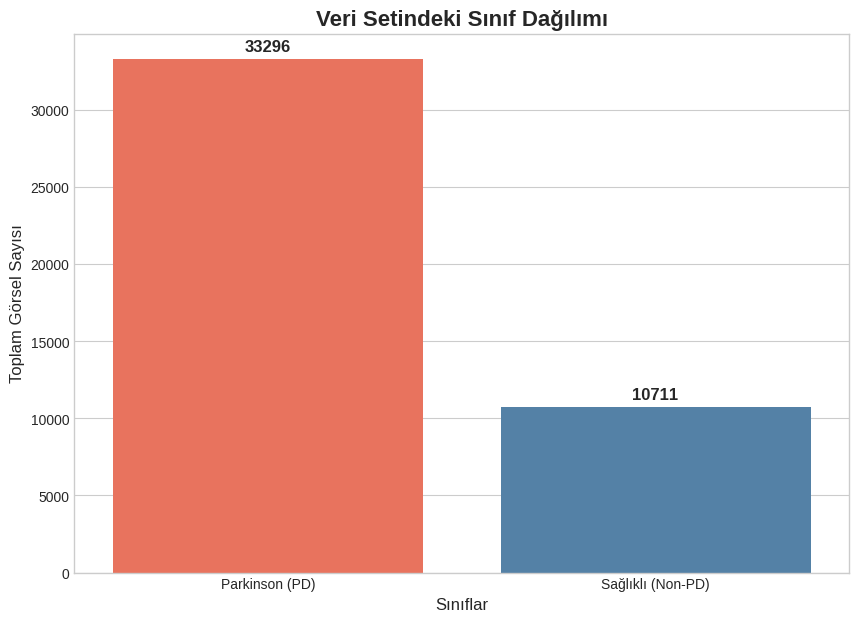

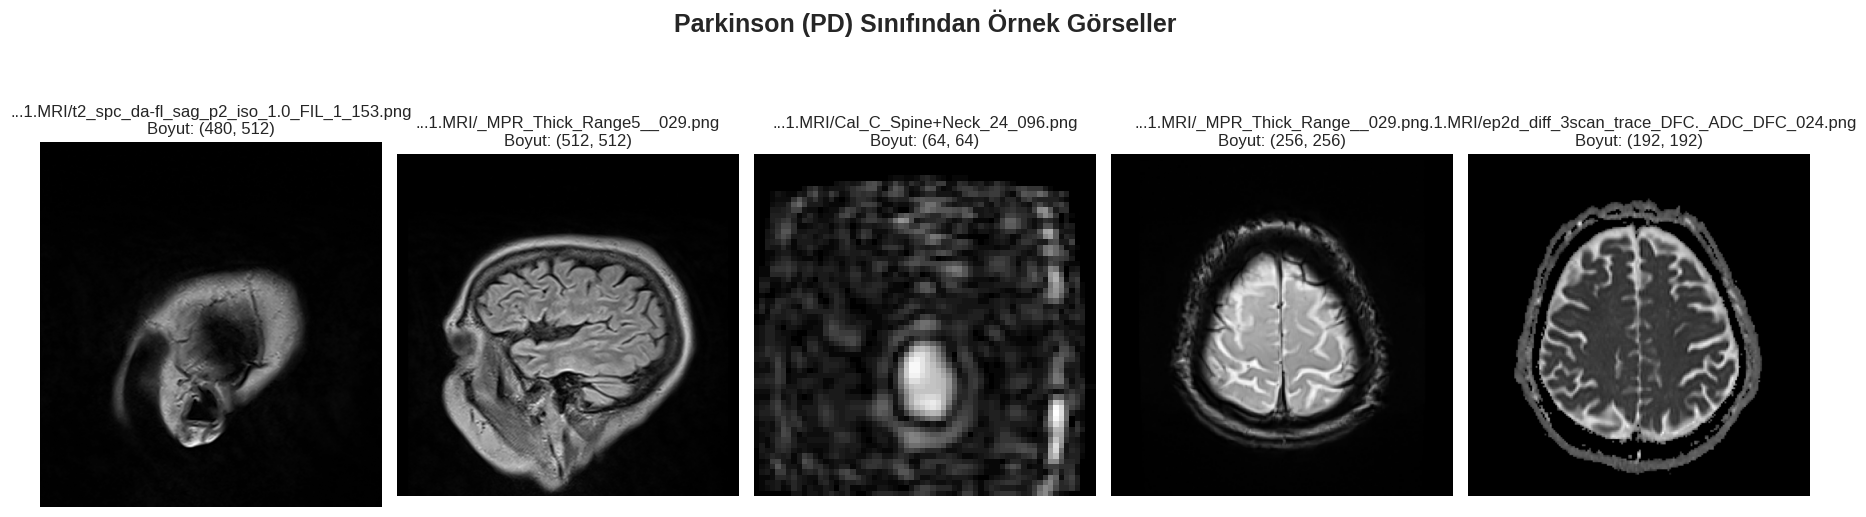

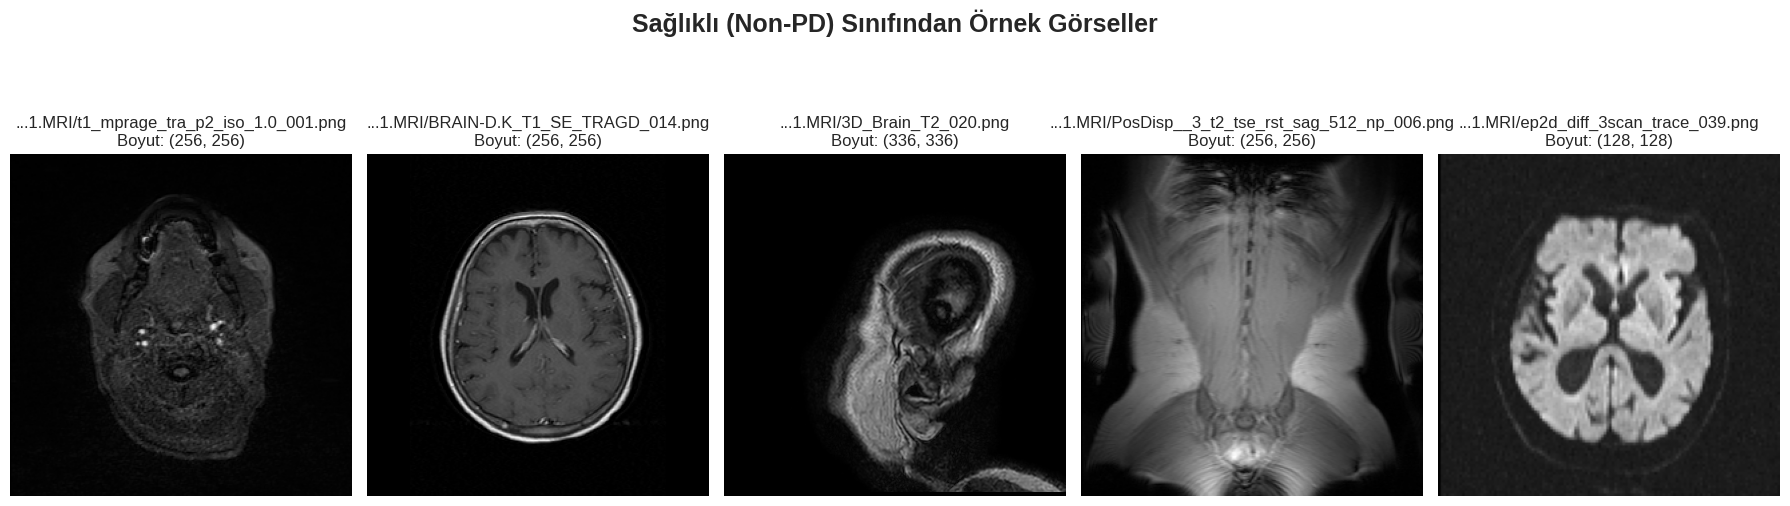

In [ ]:
#@title Veri Analizi (EDA) - Google Drive Üzerinden
# Gerekli kütüphaneleri içe aktarıyoruz
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# --- 1. Google Drive'ı Bağlama (Eğer Zaten Bağlı Değilse) ---
# Bir önceki adımda bağladıysanız tekrar izin istemeyebilir.
from google.colab import drive
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
    print("Google Drive bağlandı.")
else:
    print("Google Drive zaten bağlı.")

# --- 2. Veri Seti Yolunu Belirleme (Google Drive Konumu) ---
# Bir önceki adımda veriyi kopyaladığımız yolu buraya yazıyoruz.
DRIVE_PATH = "/content/drive/MyDrive/Colab_Datasets/ntua-parkinson-dataset-master"

# Sınıf klasörlerinin isimleri
pd_folder_name = "PD Patients"
non_pd_folder_name = "Non PD Patients"

# Klasörlerin tam yollarını oluşturuyoruz
pd_class_path = os.path.join(DRIVE_PATH, pd_folder_name)
non_pd_class_path = os.path.join(DRIVE_PATH, non_pd_folder_name)

# Klasörlerin var olup olmadığını kontrol edelim
if not os.path.exists(DRIVE_PATH):
    print(f"HATA: Belirtilen Drive yolu '{DRIVE_PATH}' bulunamadı.")
    print("Lütfen bir önceki adımda kopyalamanın başarılı olduğundan emin olun.")
else:
    print("\nGoogle Drive'daki veri seti yolu başarıyla bulundu.")
    print("-" * 50)

    # --- 3. Veri Seti Yapısını Tarama ve Dosyaları Toplama ---
    def get_image_files_from_structure(class_path):
        """Verilen klasör yapısını tarayarak tüm resim dosyalarını toplar."""
        image_paths = []
        print(f"'{class_path}' taranıyor...")
        for dirpath, _, filenames in os.walk(class_path):
            for filename in filenames:
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.dcm')):
                    image_paths.append(os.path.join(dirpath, filename))
        return image_paths

    # Her iki sınıf için de tüm resim dosyalarını topluyoruz
    # Not: Drive'daki dosya sayısı çok olduğu için bu işlem birkaç dakika sürebilir.
    print("Dosyalar taranıyor, bu işlem biraz zaman alabilir...")
    pd_image_files = get_image_files_from_structure(pd_class_path)
    non_pd_image_files = get_image_files_from_structure(non_pd_class_path)
    print("Tarama tamamlandı.")
    print("-" * 50)

    pd_image_count = len(pd_image_files)
    non_pd_image_count = len(non_pd_image_files)
    total_image_count = pd_image_count + non_pd_image_count

    print(f"Parkinson (PD Patients) sınıfındaki görsel sayısı: {pd_image_count}")
    print(f"Sağlıklı (Non PD Patients) sınıfındaki görsel sayısı: {non_pd_image_count}")
    print(f"Toplam görsel sayısı: {total_image_count}")
    print("-" * 50)

    # Veriyi bir DataFrame'e aktarıyoruz
    df = pd.DataFrame({
        'Sınıf': ['Parkinson (PD)', 'Sağlıklı (Non-PD)'],
        'Görsel Sayısı': [pd_image_count, non_pd_image_count]
    })

    # --- 4. Sınıf Dağılımını Görselleştirme ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 7))
    ax = sns.barplot(x='Sınıf', y='Görsel Sayısı', data=df, palette=['#ff6347', '#4682b4'])
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points',
                    fontsize=12, fontweight='bold')
    plt.title('Veri Setindeki Sınıf Dağılımı', fontsize=16, fontweight='bold')
    plt.xlabel('Sınıflar', fontsize=12)
    plt.ylabel('Toplam Görsel Sayısı', fontsize=12)
    plt.show()

    # --- 5. Örnek Görselleri İnceleme ---
    def show_sample_images(image_file_list, class_name, num_samples=5):
        """Verilen dosya listesinden rastgele örnek görselleri gösterir."""
        num_samples = min(num_samples, len(image_file_list))
        if num_samples == 0:
            print(f"{class_name} sınıfı için resim bulunamadı.")
            return
        sample_files = np.random.choice(image_file_list, num_samples, replace=False)
        plt.figure(figsize=(18, 6))
        plt.suptitle(f'{class_name} Sınıfından Örnek Görseller', fontsize=18, fontweight='bold')
        for i, file_path in enumerate(sample_files):
            try:
                img = Image.open(file_path)
                ax = plt.subplot(1, num_samples, i + 1)
                ax.imshow(img, cmap='gray')
                ax.set_title(f'...{os.path.basename(os.path.dirname(file_path))}{os.sep}{os.path.basename(file_path)}\nBoyut: {img.size}')
                ax.axis('off')
            except Exception as e:
                print(f"Hata: {file_path} dosyası açılamadı. Hata: {e}")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    # Her iki sınıftan da 5'er örnek görsel gösteriyoruz
    show_sample_images(pd_image_files, 'Parkinson (PD)')
    show_sample_images(non_pd_image_files, 'Sağlıklı (Non-PD)')



In [ ]:
#@title Veri Ön İşleme: CSV Manifesto Dosyası Oluşturma ve Drive'a Kaydetme

# Bir önceki hücrede tanımladığımız değişkenleri kullanıyoruz:
# pd_image_files
# non_pd_image_files
# DRIVE_PATH

print("Veri ön işleme adımı başlıyor...")

# --- 1. DataFrame Oluşturma ---
# Parkinson (PD) verilerini etiketliyoruz (etiket = 1)
pd_df = pd.DataFrame({'image_path': pd_image_files})
pd_df['label'] = 1

# Sağlıklı (Non-PD) verilerini etiketliyoruz (etiket = 0)
non_pd_df = pd.DataFrame({'image_path': non_pd_image_files})
non_pd_df['label'] = 0

# İki DataFrame'i birleştiriyoruz
full_df = pd.concat([pd_df, non_pd_df], ignore_index=True)

# --- 2. Veriyi Karıştırma ---
# Veri setinin sıralı olmasını engellemek için karıştırıyoruz.
# frac=1: tüm satırları kullan, random_state: tekrarlanabilirlik için
shuffled_df = full_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nToplam {len(shuffled_df)} görsel için DataFrame oluşturuldu ve karıştırıldı.")
print("İlk 5 satır:")
print(shuffled_df.head())
print("\nSon 5 satır:")
print(shuffled_df.tail())
print("-" * 50)

# --- 3. CSV Dosyasını Drive'a Kaydetme ---
# CSV dosyasının kaydedileceği tam yolu belirliyoruz.
# Bu, projenin kalbi olacak ve sonraki tüm adımlarda bu dosyayı kullanacağız.
csv_save_path = os.path.join("/content/drive/MyDrive/Colab_Datasets", "parkinson_dataset_manifest.csv")

try:
    shuffled_df.to_csv(csv_save_path, index=False)
    print(f"Başarılı! Manifesto dosyası şu konuma kaydedildi:")
    print(csv_save_path)
except Exception as e:
    print(f"HATA: CSV dosyası kaydedilirken bir sorun oluştu: {e}")



Veri ön işleme adımı başlıyor...

Toplam 44007 görsel için DataFrame oluşturuldu ve karıştırıldı.
İlk 5 satır:
                                          image_path  label
0  /content/drive/MyDrive/Colab_Datasets/ntua-par...      0
1  /content/drive/MyDrive/Colab_Datasets/ntua-par...      0
2  /content/drive/MyDrive/Colab_Datasets/ntua-par...      0
3  /content/drive/MyDrive/Colab_Datasets/ntua-par...      1
4  /content/drive/MyDrive/Colab_Datasets/ntua-par...      1

Son 5 satır:
                                              image_path  label
44002  /content/drive/MyDrive/Colab_Datasets/ntua-par...      1
44003  /content/drive/MyDrive/Colab_Datasets/ntua-par...      1
44004  /content/drive/MyDrive/Colab_Datasets/ntua-par...      0
44005  /content/drive/MyDrive/Colab_Datasets/ntua-par...      1
44006  /content/drive/MyDrive/Colab_Datasets/ntua-par...      1
--------------------------------------------------
Başarılı! Manifesto dosyası şu konuma kaydedildi:
/content/drive/MyDrive/Colab_D

In [ ]:
#@title Veri Setini Modellemeye Hazırlama (Dataset & DataLoader)

# --- 1. Gerekli Kütüphaneleri İçe Aktarma ---
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torchvision.transforms as transforms
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

print("Kütüphaneler yüklendi.")

# --- 2. Manifesto Dosyasını Okuma ---
# Bir önceki adımda Drive'a kaydettiğimiz CSV dosyasının yolu
DRIVE_DATASETS_PATH = "/content/drive/MyDrive/Colab_Datasets"
manifest_path = os.path.join(DRIVE_DATASETS_PATH, "parkinson_dataset_manifest.csv")

if not os.path.exists(manifest_path):
    print(f"HATA: Manifesto dosyası bulunamadı: {manifest_path}")
else:
    df = pd.read_csv(manifest_path)
    print("Manifesto dosyası başarıyla okundu.")
    print("-" * 50)

    # --- 3. Veri Setini Eğitim, Doğrulama ve Test Olarak Bölme ---
    # Stratify=df['label']: Bölme işlemi sırasında sınıfların oranını korur.
    # Bu, dengesiz veri setleri için çok önemlidir.
    train_val_df, test_df = train_test_split(
        df, test_size=0.10, random_state=42, stratify=df['label']
    )
    train_df, val_df = train_test_split(
        train_val_df, test_size=0.11, random_state=42, stratify=train_val_df['label'] # 0.90 * 0.11 ~= 0.10
    )

    print(f"Eğitim seti boyutu: {len(train_df)} ({len(train_df)/len(df):.0%})")
    print(f"Doğrulama seti boyutu: {len(val_df)} ({len(val_df)/len(df):.0%})")
    print(f"Test seti boyutu: {len(test_df)} ({len(test_df)/len(df):.0%})")
    print("-" * 50)

    # --- 4. Görüntü Dönüşümlerini (Transforms) Tanımlama ---
    # Tüm resimleri aynı boyuta getirecek ve modele uygun hale getireceğiz.
    # ImageNet'in ortalama ve standart sapma değerleri iyi bir başlangıç noktasıdır.
    IMAGE_SIZE = 224
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
            transforms.RandomHorizontalFlip(), # Veri artırma
            transforms.RandomRotation(10),     # Veri artırma
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    # Test seti için de doğrulama setiyle aynı dönüşümleri kullanacağız.
    data_transforms['test'] = data_transforms['val']
    print("Görüntü dönüşümleri (transforms) tanımlandı.")

    # --- 5. Özel PyTorch Dataset Sınıfı ---
    class ParkinsonDataset(Dataset):
        def __init__(self, dataframe, transform=None):
            self.df = dataframe
            self.transform = transform

        def __len__(self):
            return len(self.df)

        def __getitem__(self, idx):
            if torch.is_tensor(idx):
                idx = idx.tolist()

            img_path = self.df.iloc[idx, 0]
            # Bazı görseller grayscale (L modunda) olabilir, bunları RGB'ye çeviriyoruz.
            image = Image.open(img_path).convert('RGB')
            label = int(self.df.iloc[idx, 1])

            if self.transform:
                image = self.transform(image)

            return image, label

    print("Özel ParkinsonDataset sınıfı oluşturuldu.")

    # --- 6. Sınıf Ağırlıklarını Hesaplama (Dengesizliğe Karşı) ---
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_df['label']),
        y=train_df['label'].to_numpy()
    )
    class_weights = torch.tensor(class_weights, dtype=torch.float)

    print(f"Hesaplanan sınıf ağırlıkları: {class_weights}")
    print("Bu ağırlıklar eğitim sırasında kayıp fonksiyonuna verilecek.")
    print("-" * 50)

    # --- 7. Dataset ve DataLoader'ları Oluşturma ---
    image_datasets = {
        'train': ParkinsonDataset(train_df, transform=data_transforms['train']),
        'val': ParkinsonDataset(val_df, transform=data_transforms['val']),
        'test': ParkinsonDataset(test_df, transform=data_transforms['test'])
    }

    BATCH_SIZE = 32
    dataloaders = {
        'train': DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, shuffle=True, num_workers=2),
        'val': DataLoader(image_datasets['val'], batch_size=BATCH_SIZE, shuffle=False, num_workers=2),
        'test': DataLoader(image_datasets['test'], batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    }
    print("Dataset ve DataLoader'lar başarıyla oluşturuldu.")
    print("-" * 50)

    # --- 8. Test Etme: Bir Batch Veri Çekme ---
    print("Her şeyin yolunda olduğunu test etmek için eğitim setinden bir batch çekiliyor...")
    inputs, classes = next(iter(dataloaders['train']))

    print(f"Çekilen batch'in resim tensör boyutu: {inputs.shape}")
    print("Beklenen boyut: [Batch Size, Kanallar, Yükseklik, Genişlik]")
    print(f"Çekilen batch'in etiket tensör boyutu: {classes.shape}")



Kütüphaneler yüklendi.
Manifesto dosyası başarıyla okundu.
--------------------------------------------------
Eğitim seti boyutu: 35249 (80%)
Doğrulama seti boyutu: 4357 (10%)
Test seti boyutu: 4401 (10%)
--------------------------------------------------
Görüntü dönüşümleri (transforms) tanımlandı.
Özel ParkinsonDataset sınıfı oluşturuldu.
Hesaplanan sınıf ağırlıkları: tensor([2.0541, 0.6609])
Bu ağırlıklar eğitim sırasında kayıp fonksiyonuna verilecek.
--------------------------------------------------
Dataset ve DataLoader'lar başarıyla oluşturuldu.
--------------------------------------------------
Her şeyin yolunda olduğunu test etmek için eğitim setinden bir batch çekiliyor...
Çekilen batch'in resim tensör boyutu: torch.Size([32, 3, 224, 224])
Beklenen boyut: [Batch Size, Kanallar, Yükseklik, Genişlik]
Çekilen batch'in etiket tensör boyutu: torch.Size([32])


In [ ]:
#@title Model Eğitimi (TQDM İlerleme Çubuğu ile)

# --- 1. Gerekli Kütüphaneleri ve Modülleri İçe Aktarma ---
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import time
import os
import copy
import wandb
from tqdm.notebook import tqdm # TQDM kütüphanesini Colab için içe aktarıyoruz

# Önceki hücrede tanımladığımız değişkenler:
# dataloaders, image_datasets, class_weights, BATCH_SIZE

# --- 2. Weights & Biases (WandB) Entegrasyonu ---
# Eğer oturum kapandıysa tekrar giriş yapman gerekebilir.
if wandb.run is None:
    wandb.login()
    wandb.init(
        project="parkinson-diagnosis-mri",
        config={
            "learning_rate": 0.001,
            "architecture": "ResNet18",
            "dataset": "NTUA Parkinson Dataset",
            "epochs": 10,
            "batch_size": BATCH_SIZE
        }
    )
config = wandb.config

# --- 3. Cihaz (GPU/CPU) Ayarları ---
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Eğitim için kullanılacak cihaz: {device}")
print("Runtime -> Change runtime type menüsünden GPU seçili olduğundan emin olun.")
print("-" * 50)

# --- 4. Modeli Hazırlama (ResNet18) ---
model = models.resnet18(weights='IMAGENET1K_V1')
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(device)
print("ResNet18 modeli yüklendi ve transfer learning için hazırlandı.")
print("-" * 50)

# --- 5. Kayıp Fonksiyonu ve Optimizatör ---
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.fc.parameters(), lr=config.learning_rate)

# --- 6. GÜNCELLENMİŞ Eğitim Fonksiyonu ---
def train_model(model, criterion, optimizer, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        # Epoch başlangıcında bir şey yazdırmıyoruz, TQDM gösterecek

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # --- TQDM GÜNCELLEMESİ BURADA ---
            # Döngüyü TQDM ile sarmalayarak ilerleme çubuğu ekliyoruz.
            progress_bar = tqdm(dataloaders[phase], desc=f'{phase.capitalize()} Epoch {epoch + 1}/{num_epochs}')

            for inputs, labels in progress_bar:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                # İlerleme çubuğuna anlık loss değerini yazdırıyoruz
                progress_bar.set_postfix(loss=loss.item())

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            # Epoch bittiğinde sonucu konsola yazdırıyoruz
            print(f'\n{phase.capitalize()} Epoch {epoch + 1} Sonucu -> Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            wandb.log({f"{phase}_loss": epoch_loss, f"{phase}_acc": epoch_acc, "epoch": epoch+1})

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()

    time_elapsed = time.time() - since
    print(f'Eğitim {time_elapsed // 60:.0f}dk {time_elapsed % 60:.0f}s içinde tamamlandı')
    print(f'En iyi doğrulama doğruluğu: {best_acc:4f}')

    model.load_state_dict(best_model_wts)
    return model, history

# --- 7. Eğitimi Başlatma ---
model, history = train_model(model, criterion, optimizer, num_epochs=config.epochs)

# --- 8. En İyi Modeli Drive'a Kaydetme ---
DRIVE_DATASETS_PATH = "/content/drive/MyDrive/Colab_Datasets"
model_save_path = os.path.join(DRIVE_DATASETS_PATH, 'parkinson_resnet18_best_model_tqdm.pth')
torch.save(model.state_dict(), model_save_path)

print("-" * 50)
print(f"Eğitim tamamlandı! En iyi model şu adrese kaydedildi:")
print(model_save_path)

wandb.finish()



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: samuelalanzo93 (samuelalanzo93-karabuk-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Eğitim için kullanılacak cihaz: cuda:0
Runtime -> Change runtime type menüsünden GPU seçili olduğundan emin olun.
--------------------------------------------------


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s]


ResNet18 modeli yüklendi ve transfer learning için hazırlandı.
--------------------------------------------------


Train Epoch 1/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 1 Sonucu -> Loss: 0.6450 Acc: 0.6351


Val Epoch 1/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 1 Sonucu -> Loss: 0.6489 Acc: 0.5472



Train Epoch 2/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 2 Sonucu -> Loss: 0.6167 Acc: 0.6612


Val Epoch 2/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 2 Sonucu -> Loss: 0.6101 Acc: 0.6890



Train Epoch 3/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 3 Sonucu -> Loss: 0.6036 Acc: 0.6748


Val Epoch 3/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 3 Sonucu -> Loss: 0.6139 Acc: 0.6991



Train Epoch 4/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 4 Sonucu -> Loss: 0.6025 Acc: 0.6788


Val Epoch 4/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 4 Sonucu -> Loss: 0.6039 Acc: 0.6890



Train Epoch 5/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 5 Sonucu -> Loss: 0.6002 Acc: 0.6801


Val Epoch 5/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 5 Sonucu -> Loss: 0.7389 Acc: 0.7664



Train Epoch 6/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 6 Sonucu -> Loss: 0.5997 Acc: 0.6789


Val Epoch 6/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 6 Sonucu -> Loss: 0.6560 Acc: 0.7413



Train Epoch 7/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 7 Sonucu -> Loss: 0.6035 Acc: 0.6777


Val Epoch 7/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 7 Sonucu -> Loss: 0.6141 Acc: 0.7104



Train Epoch 8/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 8 Sonucu -> Loss: 0.5901 Acc: 0.6868


Val Epoch 8/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 8 Sonucu -> Loss: 0.6741 Acc: 0.7409



Train Epoch 9/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 9 Sonucu -> Loss: 0.5924 Acc: 0.6856


Val Epoch 9/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 9 Sonucu -> Loss: 0.6092 Acc: 0.6915



Train Epoch 10/10:   0%|          | 0/1102 [00:00<?, ?it/s]


Train Epoch 10 Sonucu -> Loss: 0.5931 Acc: 0.6852


Val Epoch 10/10:   0%|          | 0/137 [00:00<?, ?it/s]


Val Epoch 10 Sonucu -> Loss: 0.6118 Acc: 0.6950

Eğitim 141dk 10s içinde tamamlandı
En iyi doğrulama doğruluğu: 0.766353
--------------------------------------------------
Eğitim tamamlandı! En iyi model şu adrese kaydedildi:
/content/drive/MyDrive/Colab_Datasets/parkinson_resnet18_best_model_tqdm.pth


epoch,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
train_acc,▁▅▆▇▇▇▇███
train_loss,█▄▃▃▂▂▃▁▁▁
val_acc,▁▆▆▆█▇▆▇▆▆
val_loss,▃▁▂▁█▄▂▅▁▁
epoch,10
train_acc,0.68515
train_loss,0.59309
val_acc,0.69497
val_loss,0.61184


Değerlendirme için kütüphaneler yüklendi.
En iyi model şuradan yüklendi: /content/drive/MyDrive/Colab_Datasets/parkinson_resnet18_best_model_tqdm.pth
--------------------------------------------------


Test Ediliyor:   0%|          | 0/138 [00:00<?, ?it/s]


Modelin test seti üzerindeki performansı:
--------------------------------------------------
                   precision    recall  f1-score   support

Sağlıklı (Non-PD)       0.55      0.24      0.34      1071
   Parkinson (PD)       0.79      0.94      0.86      3330

         accuracy                           0.77      4401
        macro avg       0.67      0.59      0.60      4401
     weighted avg       0.73      0.77      0.73      4401


Karışıklık Matrisi grafiği şuraya kaydedildi: /content/drive/MyDrive/Colab_Datasets/confusion_matrix.png


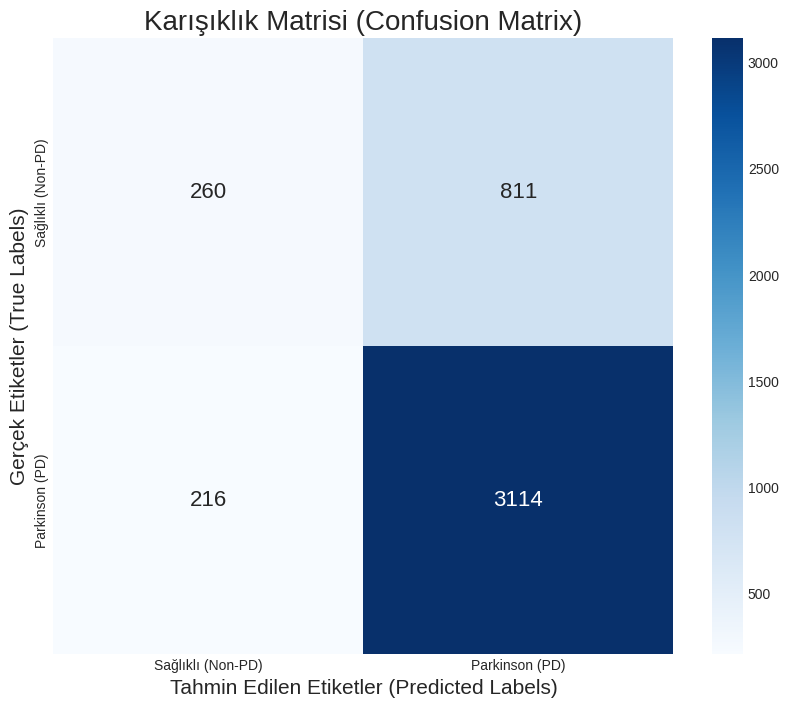

In [ ]:
#@title Modelin Test Seti Üzerinde Değerlendirilmesi

# --- 1. Gerekli Kütüphaneler ---
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import models
import torch.nn as nn

print("Değerlendirme için kütüphaneler yüklendi.")

# --- 2. En İyi Modeli Yükleme ---
# Önceki hücrelerden gelen değişkenler
# device, DRIVE_DATASETS_PATH
# Test DataLoader'ı da önceki hücrede oluşturulmuştu: dataloaders['test']

# Modelin iskeletini tekrar oluşturuyoruz
model_to_test = models.resnet18()
num_ftrs = model_to_test.fc.in_features
model_to_test.fc = nn.Linear(num_ftrs, 2)

# Kaydettiğimiz en iyi modelin ağırlıklarını yüklüyoruz
model_path = os.path.join(DRIVE_DATASETS_PATH, 'parkinson_resnet18_best_model_tqdm.pth')
model_to_test.load_state_dict(torch.load(model_path))
model_to_test = model_to_test.to(device)

print(f"En iyi model şuradan yüklendi: {model_path}")
print("-" * 50)

# --- 3. Değerlendirme Fonksiyonu ---
def evaluate_model(model, test_loader):
    model.eval()  # Modeli değerlendirme moduna al
    all_preds = []
    all_labels = []

    # Gradyan hesaplamalarını devre dışı bırakıyoruz
    with torch.no_grad():
        progress_bar = tqdm(test_loader, desc='Test Ediliyor')
        for inputs, labels in progress_bar:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

# --- 4. Modeli Test Etme ---
true_labels, predictions = evaluate_model(model_to_test, dataloaders['test'])

print("\nModelin test seti üzerindeki performansı:")
print("-" * 50)

# --- 5. Sınıflandırma Raporu (Precision, Recall, F1-Score) ---
# Sınıf isimlerini tanımlıyoruz (0: Sağlıklı, 1: Parkinson)
target_names = ['Sağlıklı (Non-PD)', 'Parkinson (PD)']
report = classification_report(true_labels, predictions, target_names=target_names)
print(report)

# --- 6. Karışıklık Matrisi (Confusion Matrix) ---
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names,
            annot_kws={"size": 16})
plt.title('Karışıklık Matrisi (Confusion Matrix)', fontsize=20)
plt.ylabel('Gerçek Etiketler (True Labels)', fontsize=15)
plt.xlabel('Tahmin Edilen Etiketler (Predicted Labels)', fontsize=15)

# Karışıklık matrisini de Drive'a kaydediyoruz
cm_save_path = os.path.join(DRIVE_DATASETS_PATH, 'confusion_matrix.png')
plt.savefig(cm_save_path)
print(f"\nKarışıklık Matrisi grafiği şuraya kaydedildi: {cm_save_path}")

plt.show()

In [ ]:
#@title Veri Hazırlama ve Gerekli Değişkenleri Oluşturma

# --- 1. Gerekli Kütüphaneler ---
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torchvision.transforms as transforms
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

print("Kütüphaneler yüklendi.")

# --- 2. Gerekli Yolları ve Değişkenleri Tanımlama ---
DRIVE_DATASETS_PATH = "/content/drive/MyDrive/Colab_Datasets"
manifest_path = os.path.join(DRIVE_DATASETS_PATH, "parkinson_dataset_manifest.csv")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64 # GPU kullandığımız için 64 iyi bir değer

print(f"Kullanılacak Cihaz: {device}")
print(f"Manifesto Dosyası Yolu: {manifest_path}")

# --- 3. Manifesto Dosyasını Okuma ve Veriyi Bölme ---
if not os.path.exists(manifest_path):
    print(f"HATA: Manifesto dosyası bulunamadı: {manifest_path}")
else:
    df = pd.read_csv(manifest_path)
    print("\nManifesto dosyası başarıyla okundu.")

    # Stratify=df['label']: Bölme işlemi sırasında sınıfların oranını korur.
    train_val_df, test_df = train_test_split(
        df, test_size=0.10, random_state=42, stratify=df['label']
    )
    train_df, val_df = train_test_split(
        train_val_df, test_size=0.11, random_state=42, stratify=train_val_df['label'] # 0.90 * 0.11 ~= 0.10
    )

    print(f"Veri setleri bölündü: {len(train_df)} Train, {len(val_df)} Val, {len(test_df)} Test")

    # --- 4. Görüntü Dönüşümleri ve Dataset Sınıfı ---
    IMAGE_SIZE = 224
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    data_transforms['test'] = data_transforms['val']

    class ParkinsonDataset(Dataset):
        def __init__(self, dataframe, transform=None):
            self.df = dataframe
            self.transform = transform
        def __len__(self):
            return len(self.df)
        def __getitem__(self, idx):
            # Buradaki dosya yolları yerel diskteki (/content/...) yollardır
            img_path = self.df.iloc[idx, 0]
            image = Image.open(img_path).convert('RGB')
            label = int(self.df.iloc[idx, 1])
            if self.transform:
                image = self.transform(image)
            return image, label

    # --- 5. Sınıf Ağırlıkları, Dataset ve DataLoader'ları Oluşturma ---
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_df['label']),
        y=train_df['label'].to_numpy()
    )
    class_weights = torch.tensor(class_weights, dtype=torch.float)
    print(f"\nHesaplanan sınıf ağırlıkları: {class_weights}")

    image_datasets = {
        'train': ParkinsonDataset(train_df, transform=data_transforms['train']),
        'val': ParkinsonDataset(val_df, transform=data_transforms['val']),
        'test': ParkinsonDataset(test_df, transform=data_transforms['test'])
    }

    dataloaders = {
        'train': DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, shuffle=True, num_workers=2),
        'val': DataLoader(image_datasets['val'], batch_size=BATCH_SIZE, shuffle=False, num_workers=2),
        'test': DataLoader(image_datasets['test'], batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    }

    print("\nDataset ve DataLoader'lar başarıyla oluşturuldu ve İnce Ayar (Fine-Tuning) için hazır.")


Kütüphaneler yüklendi.
Kullanılacak Cihaz: cpu
Manifesto Dosyası Yolu: /content/drive/MyDrive/Colab_Datasets/parkinson_dataset_manifest.csv

Manifesto dosyası başarıyla okundu.
Veri setleri bölündü: 35249 Train, 4357 Val, 4401 Test

Hesaplanan sınıf ağırlıkları: tensor([2.0541, 0.6609])

Dataset ve DataLoader'lar başarıyla oluşturuldu ve İnce Ayar (Fine-Tuning) için hazır.


In [ ]:
#@title Model Geliştirme: İnce Ayar (Fine-Tuning)

# --- 1. Gerekli Kütüphaneler ---
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import time
import os
import copy
import wandb
from tqdm.notebook import tqdm

print("İnce Ayar (Fine-Tuning) süreci için hazırlıklar yapılıyor...")

# --- 2. Önceki Hücrelerden Gelen Değişkenler ---
# dataloaders, image_datasets, class_weights, device
# DRIVE_DATASETS_PATH, BATCH_SIZE

# --- 3. Yeni bir WandB Deneyi Başlatma ---
# Bu deneyi bir öncekinden ayırmak için yeni bir proje veya grup adı kullanabiliriz.
if wandb.run:
    wandb.finish() # Önceki deneyi kapat

# wandb.login() # Already logged in from previous cell
wandb.init(
    project="parkinson-diagnosis-mri-finetune", # Yeni proje adı
    config={
        "learning_rate": 1e-5, # ÇOK ÖNEMLİ: Çok daha düşük bir öğrenme oranı
        "architecture": "ResNet18 - Fine-Tuned",
        "dataset": "NTUA Parkinson Dataset",
        "epochs": 5, # İnce ayar için genellikle daha az epoch yeterlidir
        "batch_size": BATCH_SIZE
    }
)
config = wandb.config

# --- 4. Eğitilmiş Modeli Yükleme ve Katmanları Çözme ---
# Bir önceki adımda kaydettiğimiz en iyi modeli yüklüyoruz
model_ft = models.resnet18()
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_path = os.path.join(DRIVE_DATASETS_PATH, 'parkinson_resnet18_best_model_tqdm.pth')
# Hata düzeltme: Modeli yüklerken map_location'ı belirtiyoruz
model_ft.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))


# --- ÖNEMLİ ADIM: TÜM KATMANLARI EĞİTİME AÇIYORUZ ---
for param in model_ft.parameters():
    param.requires_grad = True

# Modeli doğru cihaza (GPU veya CPU) taşıyoruz
model_ft = model_ft.to(device)
print("En iyi model yüklendi ve tüm katmanları eğitim için çözüldü.")
print("-" * 50)


# --- 5. Yeni Optimizatör Tanımlama ---
# Tüm katmanlar çözüldüğü için, optimizatöre modelin TÜM parametrelerini veriyoruz.
optimizer_ft = optim.Adam(model_ft.parameters(), lr=config.learning_rate)

# Kayıp fonksiyonu aynı kalıyor
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

# --- 6. Eğitimi Başlatma ---
# Daha önce yazdığımız train_model fonksiyonunu yeniden kullanabiliriz.
# Sadece yeni modeli ve yeni optimizatörü vermemiz yeterli.
print("İnce ayar eğitimi başlıyor...")

# Eğitim fonksiyonunu burada tekrar tanımlıyoruz ki bu hücre bağımsız çalışabilsin
def train_model(model, criterion, optimizer, num_epochs=5):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()
            running_loss, running_corrects = 0.0, 0
            progress_bar = tqdm(dataloaders[phase], desc=f'Fine-Tune Epoch {epoch + 1}/{num_epochs} ({phase})')
            for inputs, labels in progress_bar:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                progress_bar.set_postfix(loss=loss.item())
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])
            print(f'\nFine-Tune Epoch {epoch + 1} ({phase}) Sonucu -> Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            wandb.log({f"ft_{phase}_loss": epoch_loss, f"ft_{phase}_acc": epoch_acc, "epoch": epoch+1})
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
    print()
    time_elapsed = time.time() - since
    print(f'İnce ayar {time_elapsed // 60:.0f}dk {time_elapsed % 60:.0f}s içinde tamamlandı')
    print(f'En iyi doğrulama doğruluğu: {best_acc:4f}')
    model.load_state_dict(best_model_wts)
    return model

# Eğitimi başlat
model_ft_tuned = train_model(model_ft, criterion, optimizer_ft, num_epochs=config.epochs)

# --- 7. İnce Ayarlanmış Modeli Kaydetme ---
# Yeni modeli farklı bir isimle kaydediyoruz
finetuned_model_save_path = os.path.join(DRIVE_DATASETS_PATH, 'parkinson_resnet18_finetuned.pth')
torch.save(model_ft_tuned.state_dict(), finetuned_model_save_path)

print("-" * 50)
print(f"İnce ayar tamamlandı! Geliştirilmiş model şu adrese kaydedildi:")
print(finetuned_model_save_path)

wandb.finish()

İnce Ayar (Fine-Tuning) süreci için hazırlıklar yapılıyor...


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: samuelalanzo93 (samuelalanzo93-karabuk-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


En iyi model yüklendi ve tüm katmanları eğitim için çözüldü.
--------------------------------------------------
İnce ayar eğitimi başlıyor...


Fine-Tune Epoch 1/5 (train):   0%|          | 0/551 [00:00<?, ?it/s]

KeyboardInterrupt: 